In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt

### 1. Data

In [35]:
np.random.seed(2345)
# x = np.random.rand(10000) - 0.5   ## random x
x = np.random.randint(-50, 50, 100000)/10


y1 = np.subtract(np.multiply(x, 5), 2)      ## y=5x-2
y2 = np.square(x) + 0.5                     ## y=x**2+0.5
y3 = norm.pdf(x, 0, 1) ## gaussian
y4 = np.power(x, 5) + 0.2* np.power(x, 3)  ## y=x**5+0.2x**3


In [36]:
x

array([ 3. , -4.3,  4.6, ..., -4.9, -2.3,  2.2])

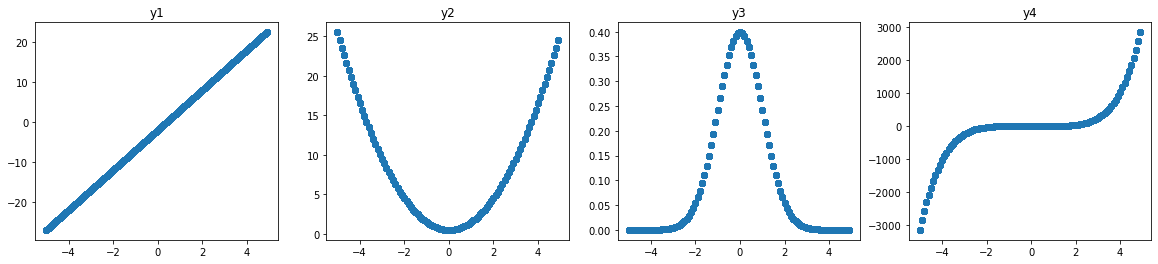

In [37]:
## plot function
fig, ax = plt.subplots(1,4, figsize=(20, 4))
ax[0].scatter(x,y1)
ax[0].set_title("y1")

ax[1].scatter(x,y2)
ax[1].set_title("y2")

ax[2].scatter(x,y3)
ax[2].set_title("y3")

ax[3].scatter(x,y4)
ax[3].set_title("y4")


plt.show()

In [38]:
## store results
results = pd.DataFrame(columns=['lr_mse', 'mlp_mse', 'function'])
results.function = pd.Series(['y1', 'y2', 'y3', 'y4'])
results.set_index('function', inplace=True)


results

,lr_mse,mlp_mse
function,,
y1,NaN,NaN
y2,NaN,NaN
y3,NaN,NaN
y4,NaN,NaN


### 2. Linear Regression

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


In [40]:
def linear_regression(x, y, ax, index):
    
    ## train test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2345)
    #print(X_test)
    
    ##
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train.reshape(-1, 1))
    X_test_ss = ss.transform(X_test.reshape(-1, 1))

    
    ## linear regression
    reg = LinearRegression().fit(X_train_ss, y_train)
    y_predict = reg.predict(X_test_ss)
    
    ## plot test
    ax[index].scatter(X_test, y_test)
    ax[index].plot(X_test, y_predict, color='red', linewidth=2)
    ax[index].set_title("y"+str(index+1))
    
    ## test mse
    lr_mse = mean_squared_error(y_test, y_predict, squared=False)
    lr_mse = np.round(lr_mse, 4)
    
    return lr_mse, y_predict  

,lr_mse,mlp_mse
function,,
y1,0,NaN
y2,7.4609,NaN
y3,0.1346,NaN
y4,543.277,NaN


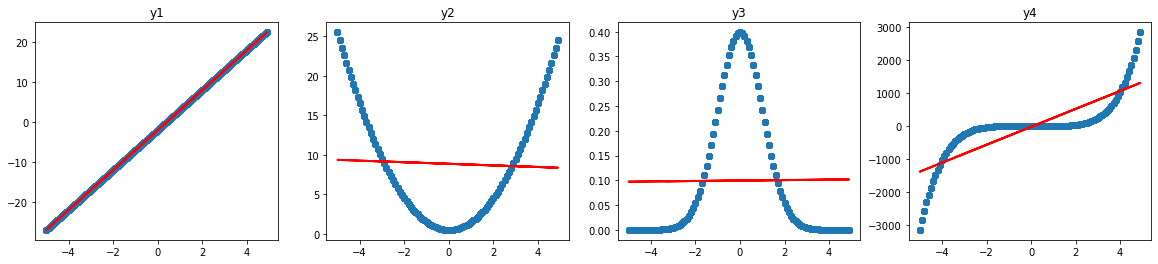

In [41]:
## linear regression results
fig, ax = plt.subplots(1,4, figsize=(20, 4))


results.loc['y1', 'lr_mse'], lr_y_pred1 = linear_regression(x, y1, ax, 0)
results.loc['y2', 'lr_mse'], lr_y_pred2 = linear_regression(x, y2, ax, 1)
results.loc['y3', 'lr_mse'], lr_y_pred3 = linear_regression(x, y3, ax, 2)
results.loc['y4', 'lr_mse'], lr_y_pred4 = linear_regression(x, y4, ax, 3)

results

### 3. Multilayer Perception

In [42]:
import keras
from keras.models import Sequential 
from keras.layers import Dense,Dropout

In [43]:
x.shape

(100000,)

In [44]:
def multilayer_perception(x, y, ax, index):
    
    ## train test split
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=2345)
    
    ## standardisation
    ss = StandardScaler()
    X_train_ss = ss.fit_transform(X_train.reshape(-1, 1))
    X_test_ss = ss.transform(X_test.reshape(-1, 1))
    
    ## model
    model = Sequential()
    model.add(keras.Input(shape=(1,)))
    model.add(Dense(120, activation="relu"))
    model.add(Dense(120, activation="relu"))
    model.add(Dense(120, activation="relu"))
    model.add(Dense(120, activation="relu"))

    model.add(Dense(1))
    
    ## compile
    model.compile(loss='mean_squared_error', optimizer='adam')
    
    ## train
    model.fit(X_train_ss, y_train, epochs=100, batch_size=100, verbose=0)
    
    ## predict
    y_predict = model.predict(X_test_ss)

    
    ## plot test
    ax[index].scatter(X_test, y_test, s=20)
    ax[index].scatter(X_test, y_predict, s=1, color='red')
    ax[index].legend(('test y', 'predict y'), loc='upper right')
    ax[index].set_title("y"+str(index+1))
    
    ## test mse
    mlp_mse = mean_squared_error(y_test, y_predict, squared=False)
    mlp_mse = np.round(mlp_mse, 4)
    
    
    return mlp_mse, y_predict 

,lr_mse,mlp_mse
function,,
y1,0,0.0226
y2,7.4609,0.0125
y3,0.1346,0.0003
y4,543.277,5.6703


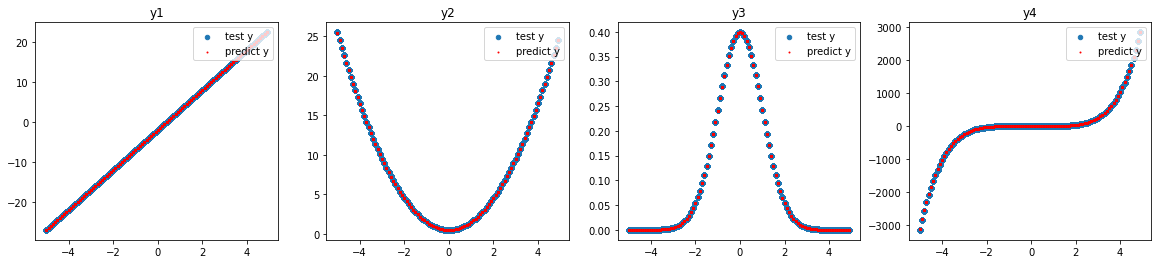

In [45]:
## MLP results
fig, ax = plt.subplots(1,4, figsize=(20, 4))


results.loc['y1', 'mlp_mse'], mlp_y_pred1 = multilayer_perception(x, y1, ax, 0)
results.loc['y2', 'mlp_mse'], mlp_y_pred2 = multilayer_perception(x, y2, ax, 1)
results.loc['y3', 'mlp_mse'], mlp_y_pred3 = multilayer_perception(x, y3, ax, 2)
results.loc['y4', 'mlp_mse'], mlp_y_pred4 = multilayer_perception(x, y4, ax, 3)

results

In [46]:
### y1

## train test split
X_train, X_test, y_train, y_test = train_test_split(x, y1, test_size=0.33, random_state=2345)
    
## standardisation
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train.reshape(-1, 1))
X_test_ss = ss.transform(X_test.reshape(-1, 1))
    
## model
model1 = Sequential()
model1.add(keras.Input(shape=(1,)))
# model1.add(Dense(2))
# model1.add(Dense(120, activation="relu"))
# model1.add(Dense(120, activation="relu"))
# model1.add(Dense(120, activation="relu"))

model1.add(Dense(1))

## compile
model1.compile(loss='mean_squared_error', optimizer='adam')
    
## train
model1.fit(X_train_ss, y_train, epochs=50, batch_size=100, verbose=0)
## early stop
    
## predict
y_predict1 = model1.predict(X_test_ss)


## mse
test_mse1 = mean_squared_error(y_test, y_predict1, squared=False)
print('test mse:', test_mse1)
train_mse1 = mean_squared_error(y_train, model1.predict(X_train_ss), squared=False)
print('train mse:', train_mse1)


test mse: 5.8558866762831394e-05
train mse: 5.8693990522479e-05


In [27]:
### y2

## train test split
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.33, random_state=2345)
    
## standardisation
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train.reshape(-1, 1))
X_test_ss = ss.transform(X_test.reshape(-1, 1))
    
## model
model2 = Sequential()
model2.add(keras.Input(shape=(1,)))
model2.add(Dense(200, activation="relu"))
model2.add(Dense(200, activation="relu"))
model2.add(Dense(100, activation="relu"))
model2.add(Dense(100, activation="relu"))

model2.add(Dense(1))

## compile
model2.compile(loss='mean_squared_error', optimizer='adam')
    
## train
model2.fit(X_train_ss, y_train, epochs=1024, batch_size=100)
    
## predict
y_predict2 = model2.predict(X_test_ss)


## mse
test_mse2 = mean_squared_error(y_test, y_predict2, squared=False)
print('test mse:', np.round(test_mse2, 4))
train_mse2 = mean_squared_error(y_train, model2.predict(X_train_ss), squared=False)
print('train mse:', np.round(train_mse2, 4))


Epoch 1/1024
67/67 [==============================] - 0s 1ms/step - loss: 43.6823
Epoch 2/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.0541
Epoch 3/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.4989
Epoch 4/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0700
Epoch 5/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0233
Epoch 6/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0113
Epoch 7/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0055
Epoch 8/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 9/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0022
Epoch 10/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0018
Epoch 11/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0014
Epoch 12/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0011
Epoch 13/1024
67/67 [===

67/67 [==============================] - 0s 1ms/step - loss: 5.7908e-04
Epoch 99/1024
67/67 [==============================] - 0s 966us/step - loss: 0.0015
Epoch 100/1024
67/67 [==============================] - 0s 976us/step - loss: 2.5715e-04
Epoch 101/1024
67/67 [==============================] - 0s 982us/step - loss: 4.6345e-04
Epoch 102/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.5873e-04
Epoch 103/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.2459e-04
Epoch 104/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.1329e-04
Epoch 105/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.1024e-04
Epoch 106/1024
67/67 [==============================] - 0s 974us/step - loss: 0.0040
Epoch 107/1024
67/67 [==============================] - 0s 978us/step - loss: 7.7347e-04
Epoch 108/1024
67/67 [==============================] - 0s 984us/step - loss: 0.0033
Epoch 109/1024
67/67 [==============================] - 0s 

67/67 [==============================] - 0s 988us/step - loss: 0.0078
Epoch 193/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 194/1024
67/67 [==============================] - 0s 961us/step - loss: 0.0020
Epoch 195/1024
67/67 [==============================] - 0s 970us/step - loss: 1.3520e-04
Epoch 196/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.6421e-04
Epoch 197/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.7080e-04
Epoch 198/1024
67/67 [==============================] - 0s 972us/step - loss: 7.1897e-05
Epoch 199/1024
67/67 [==============================] - 0s 979us/step - loss: 1.0767e-04
Epoch 200/1024
67/67 [==============================] - 0s 991us/step - loss: 1.0453e-04
Epoch 201/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.2614e-04
Epoch 202/1024
67/67 [==============================] - 0s 984us/step - loss: 1.7810e-04
Epoch 203/1024
67/67 [==============================] - 

67/67 [==============================] - 0s 1ms/step - loss: 0.0029
Epoch 287/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.9652e-04
Epoch 288/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.4746e-05
Epoch 289/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.1501e-05
Epoch 290/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.5435e-05
Epoch 291/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.9544e-04
Epoch 292/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.8949e-04
Epoch 293/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0013
Epoch 294/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0171
Epoch 295/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 296/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.4712e-05
Epoch 297/1024
67/67 [==============================] - 0s 1ms/step - loss

67/67 [==============================] - 0s 1ms/step - loss: 0.0012
Epoch 382/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0054
Epoch 383/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.1914e-04
Epoch 384/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.0320e-05
Epoch 385/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.9068e-05
Epoch 386/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.2985e-05
Epoch 387/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.3088e-04
Epoch 388/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.2242e-05
Epoch 389/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.9705e-04
Epoch 390/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0010
Epoch 391/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.1998e-04
Epoch 392/1024
67/67 [==============================] - 0s 1ms/step - 

Epoch 477/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 478/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.1096e-04
Epoch 479/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.3536e-05
Epoch 480/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.6495e-05
Epoch 481/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.6650e-04
Epoch 482/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.1494e-04
Epoch 483/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.3328e-05
Epoch 484/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.1230e-05
Epoch 485/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.5908e-05
Epoch 486/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.0336e-05
Epoch 487/1024
67/67 [==============================] - 0s 996us/step - loss: 2.9145e-05
Epoch 488/1024
67/67 [=======================

67/67 [==============================] - 0s 1ms/step - loss: 1.4708e-04
Epoch 573/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.0150e-05
Epoch 574/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.7239e-05
Epoch 575/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.7432e-05
Epoch 576/1024
67/67 [==============================] - 0s 1ms/step - loss: 8.0310e-04
Epoch 577/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.9915e-04
Epoch 578/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.3646e-04
Epoch 579/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0038
Epoch 580/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.1732e-04
Epoch 581/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.2762e-04
Epoch 582/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.9001e-04
Epoch 583/1024
67/67 [==============================] - 0s 1ms

Epoch 667/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.9103e-05
Epoch 668/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.8011e-05
Epoch 669/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.7775e-05
Epoch 670/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0026
Epoch 671/1024
67/67 [==============================] - 0s 989us/step - loss: 0.0108
Epoch 672/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.8130e-04
Epoch 673/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.7982e-05
Epoch 674/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.0815e-05
Epoch 675/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.2139e-05
Epoch 676/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.1530e-05
Epoch 677/1024
67/67 [==============================] - 0s 1ms/step - loss: 8.8927e-05
Epoch 678/1024
67/67 [===========================

Epoch 762/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.9151e-05
Epoch 763/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.9285e-05
Epoch 764/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.6613e-05
Epoch 765/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.6343e-05
Epoch 766/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.6045e-05
Epoch 767/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.5600e-04
Epoch 768/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0041
Epoch 769/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0036
Epoch 770/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.0268e-04
Epoch 771/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.3840e-05
Epoch 772/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.2336e-05
Epoch 773/1024
67/67 [=============================

67/67 [==============================] - 0s 1ms/step - loss: 2.0379e-04
Epoch 858/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.9723e-05
Epoch 859/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.3461e-05
Epoch 860/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.2808e-05
Epoch 861/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.1573e-05
Epoch 862/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.4066e-04
Epoch 863/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.8412e-04
Epoch 864/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0042
Epoch 865/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0017
Epoch 866/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0046
Epoch 867/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.2488e-04
Epoch 868/1024
67/67 [==============================] - 0s 1ms/step - 

67/67 [==============================] - 0s 1ms/step - loss: 2.9207e-05
Epoch 953/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.1003e-05
Epoch 954/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.2410e-05
Epoch 955/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.0935e-05
Epoch 956/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.1437e-04
Epoch 957/1024
67/67 [==============================] - 0s 1ms/step - loss: 1.2218e-04
Epoch 958/1024
67/67 [==============================] - 0s 1ms/step - loss: 0.0015
Epoch 959/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.9793e-04
Epoch 960/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.4910e-05
Epoch 961/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.5554e-05
Epoch 962/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.2301e-04
Epoch 963/1024
67/67 [==============================] - 0s 998

In [29]:
### y4

## train test split
X_train, X_test, y_train, y_test = train_test_split(x, y4, test_size=0.33, random_state=2345)
    
## standardisation
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train.reshape(-1, 1))
X_test_ss = ss.transform(X_test.reshape(-1, 1))
    
## model
model4 = Sequential()
model4.add(keras.Input(shape=(1,)))
model4.add(Dense(200, activation="relu"))
model4.add(Dense(120, activation="relu"))
model4.add(Dense(120, activation="relu"))
model4.add(Dense(120, activation="relu"))

model4.add(Dense(1))

## compile
model4.compile(loss='mean_squared_error', optimizer='adam')
    
## train
model4.fit(X_train_ss, y_train, epochs=1024, batch_size=100)
    
## predict
y_predict4 = model.predict(X_test_ss)


## mse
test_mse4 = mean_squared_error(y_test, y_predict4, squared=False)
print('test mse:', np.round(test_mse4, 4))
train_mse4 = mean_squared_error(y_train, model.predict(X_train_ss), squared=False)
print('train mse:', np.round(train_mse4, 4))

Epoch 1/1024
67/67 [==============================] - 0s 1ms/step - loss: 872196.0000
Epoch 2/1024
67/67 [==============================] - 0s 1ms/step - loss: 393901.2812
Epoch 3/1024
67/67 [==============================] - 0s 1ms/step - loss: 298506.2500
Epoch 4/1024
67/67 [==============================] - 0s 972us/step - loss: 194120.5781
Epoch 5/1024
67/67 [==============================] - 0s 1ms/step - loss: 91019.2656
Epoch 6/1024
67/67 [==============================] - 0s 995us/step - loss: 37578.8672
Epoch 7/1024
67/67 [==============================] - 0s 943us/step - loss: 15464.3076
Epoch 8/1024
67/67 [==============================] - 0s 933us/step - loss: 7750.4966
Epoch 9/1024
67/67 [==============================] - 0s 956us/step - loss: 4160.1094
Epoch 10/1024
67/67 [==============================] - 0s 940us/step - loss: 2553.2373
Epoch 11/1024
67/67 [==============================] - 0s 921us/step - loss: 1689.1434
Epoch 12/1024
67/67 [============================

67/67 [==============================] - 0s 889us/step - loss: 12.1133
Epoch 98/1024
67/67 [==============================] - 0s 1ms/step - loss: 47.4708
Epoch 99/1024
67/67 [==============================] - 0s 1ms/step - loss: 100.2567
Epoch 100/1024
67/67 [==============================] - 0s 1ms/step - loss: 156.0331
Epoch 101/1024
67/67 [==============================] - 0s 1ms/step - loss: 74.7402
Epoch 102/1024
67/67 [==============================] - 0s 1ms/step - loss: 27.3304
Epoch 103/1024
67/67 [==============================] - 0s 1ms/step - loss: 64.0365
Epoch 104/1024
67/67 [==============================] - 0s 1ms/step - loss: 53.8193
Epoch 105/1024
67/67 [==============================] - 0s 1ms/step - loss: 27.0363
Epoch 106/1024
67/67 [==============================] - 0s 1ms/step - loss: 59.2077
Epoch 107/1024
67/67 [==============================] - 0s 1ms/step - loss: 19.7574
Epoch 108/1024
67/67 [==============================] - 0s 1ms/step - loss: 16.5238
Epoch

67/67 [==============================] - 0s 1ms/step - loss: 64.9315
Epoch 194/1024
67/67 [==============================] - 0s 1ms/step - loss: 18.5258
Epoch 195/1024
67/67 [==============================] - 0s 1ms/step - loss: 247.1355
Epoch 196/1024
67/67 [==============================] - 0s 1ms/step - loss: 124.1974
Epoch 197/1024
67/67 [==============================] - 0s 1ms/step - loss: 200.5648
Epoch 198/1024
67/67 [==============================] - 0s 1ms/step - loss: 84.5467
Epoch 199/1024
67/67 [==============================] - 0s 1ms/step - loss: 28.6712
Epoch 200/1024
67/67 [==============================] - 0s 1ms/step - loss: 19.9469
Epoch 201/1024
67/67 [==============================] - 0s 1ms/step - loss: 29.8678
Epoch 202/1024
67/67 [==============================] - 0s 1ms/step - loss: 19.3025
Epoch 203/1024
67/67 [==============================] - 0s 1ms/step - loss: 12.4911
Epoch 204/1024
67/67 [==============================] - 0s 1ms/step - loss: 44.0018
Epoc

67/67 [==============================] - 0s 1ms/step - loss: 9.1389
Epoch 291/1024
67/67 [==============================] - 0s 1ms/step - loss: 8.0069
Epoch 292/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.7612
Epoch 293/1024
67/67 [==============================] - 0s 1ms/step - loss: 10.6070
Epoch 294/1024
67/67 [==============================] - 0s 1ms/step - loss: 17.1543
Epoch 295/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.0762
Epoch 296/1024
67/67 [==============================] - 0s 984us/step - loss: 30.4832
Epoch 297/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.6825
Epoch 298/1024
67/67 [==============================] - 0s 1ms/step - loss: 30.5530
Epoch 299/1024
67/67 [==============================] - 0s 990us/step - loss: 25.9610
Epoch 300/1024
67/67 [==============================] - 0s 1ms/step - loss: 48.4907
Epoch 301/1024
67/67 [==============================] - 0s 1ms/step - loss: 17.1301
Epoch 30

67/67 [==============================] - 0s 1ms/step - loss: 8.1985
Epoch 388/1024
67/67 [==============================] - 0s 1ms/step - loss: 12.9391
Epoch 389/1024
67/67 [==============================] - 0s 1ms/step - loss: 10.8657
Epoch 390/1024
67/67 [==============================] - 0s 1ms/step - loss: 20.7074
Epoch 391/1024
67/67 [==============================] - 0s 1ms/step - loss: 304.1141
Epoch 392/1024
67/67 [==============================] - 0s 1ms/step - loss: 57.1899
Epoch 393/1024
67/67 [==============================] - 0s 1ms/step - loss: 8.5504
Epoch 394/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.7083
Epoch 395/1024
67/67 [==============================] - 0s 1ms/step - loss: 11.8668
Epoch 396/1024
67/67 [==============================] - 0s 1ms/step - loss: 8.7042
Epoch 397/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.1020
Epoch 398/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.4106
Epoch 399/10

67/67 [==============================] - 0s 1ms/step - loss: 65.3567
Epoch 485/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.2002
Epoch 486/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.9709
Epoch 487/1024
67/67 [==============================] - 0s 1ms/step - loss: 19.0757
Epoch 488/1024
67/67 [==============================] - 0s 1ms/step - loss: 118.9181
Epoch 489/1024
67/67 [==============================] - 0s 1ms/step - loss: 16.9990
Epoch 490/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.7983
Epoch 491/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.5831
Epoch 492/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.5954
Epoch 493/1024
67/67 [==============================] - 0s 1ms/step - loss: 55.6663
Epoch 494/1024
67/67 [==============================] - 0s 1ms/step - loss: 48.5320
Epoch 495/1024
67/67 [==============================] - 0s 1ms/step - loss: 67.2988
Epoch 496/1

67/67 [==============================] - 0s 1ms/step - loss: 4.3966
Epoch 582/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.6618
Epoch 583/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.3374
Epoch 584/1024
67/67 [==============================] - 0s 996us/step - loss: 7.8118
Epoch 585/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.3968
Epoch 586/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.0032
Epoch 587/1024
67/67 [==============================] - 0s 1ms/step - loss: 282.3156
Epoch 588/1024
67/67 [==============================] - 0s 1ms/step - loss: 59.6077
Epoch 589/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.2848
Epoch 590/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.9587
Epoch 591/1024
67/67 [==============================] - 0s 968us/step - loss: 9.3998
Epoch 592/1024
67/67 [==============================] - 0s 991us/step - loss: 11.6445
Epoch 593

Epoch 679/1024
67/67 [==============================] - 0s 1ms/step - loss: 12.8671
Epoch 680/1024
67/67 [==============================] - 0s 1ms/step - loss: 7.1481
Epoch 681/1024
67/67 [==============================] - 0s 1ms/step - loss: 20.7415
Epoch 682/1024
67/67 [==============================] - 0s 1ms/step - loss: 22.9251
Epoch 683/1024
67/67 [==============================] - 0s 1ms/step - loss: 57.6648
Epoch 684/1024
67/67 [==============================] - 0s 1ms/step - loss: 34.6943
Epoch 685/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.6753
Epoch 686/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.9190
Epoch 687/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.0413
Epoch 688/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.8013
Epoch 689/1024
67/67 [==============================] - 0s 1ms/step - loss: 2.7132
Epoch 690/1024
67/67 [==============================] - 0s 1ms/step - loss: 450.01

67/67 [==============================] - 0s 1ms/step - loss: 20.8224
Epoch 776/1024
67/67 [==============================] - 0s 1ms/step - loss: 3.9914
Epoch 777/1024
67/67 [==============================] - 0s 1ms/step - loss: 9.7102
Epoch 778/1024
67/67 [==============================] - 0s 986us/step - loss: 7.3895
Epoch 779/1024
67/67 [==============================] - 0s 1ms/step - loss: 8.2562
Epoch 780/1024
67/67 [==============================] - 0s 962us/step - loss: 12.7416
Epoch 781/1024
67/67 [==============================] - 0s 966us/step - loss: 17.3738
Epoch 782/1024
67/67 [==============================] - 0s 1ms/step - loss: 32.8972
Epoch 783/1024
67/67 [==============================] - 0s 973us/step - loss: 16.7036
Epoch 784/1024
67/67 [==============================] - 0s 990us/step - loss: 12.4273
Epoch 785/1024
67/67 [==============================] - 0s 1ms/step - loss: 15.0944
Epoch 786/1024
67/67 [==============================] - 0s 1ms/step - loss: 21.4933
E

67/67 [==============================] - 0s 1ms/step - loss: 46.9758
Epoch 873/1024
67/67 [==============================] - 0s 1ms/step - loss: 144.7984
Epoch 874/1024
67/67 [==============================] - 0s 966us/step - loss: 16.4201
Epoch 875/1024
67/67 [==============================] - 0s 990us/step - loss: 24.4635
Epoch 876/1024
67/67 [==============================] - 0s 965us/step - loss: 113.1849
Epoch 877/1024
67/67 [==============================] - 0s 984us/step - loss: 33.6574
Epoch 878/1024
67/67 [==============================] - 0s 949us/step - loss: 37.4403
Epoch 879/1024
67/67 [==============================] - 0s 1ms/step - loss: 68.0081
Epoch 880/1024
67/67 [==============================] - 0s 966us/step - loss: 45.4030
Epoch 881/1024
67/67 [==============================] - 0s 1ms/step - loss: 12.2002
Epoch 882/1024
67/67 [==============================] - 0s 1ms/step - loss: 6.7447
Epoch 883/1024
67/67 [==============================] - 0s 1ms/step - loss: 11

67/67 [==============================] - 0s 1ms/step - loss: 6.1879
Epoch 969/1024
67/67 [==============================] - 0s 1ms/step - loss: 5.4251
Epoch 970/1024
67/67 [==============================] - 0s 987us/step - loss: 98.1204
Epoch 971/1024
67/67 [==============================] - 0s 1ms/step - loss: 32.0484
Epoch 972/1024
67/67 [==============================] - 0s 1ms/step - loss: 13.0411
Epoch 973/1024
67/67 [==============================] - 0s 1ms/step - loss: 39.7285
Epoch 974/1024
67/67 [==============================] - 0s 1ms/step - loss: 11.4810
Epoch 975/1024
67/67 [==============================] - 0s 989us/step - loss: 25.2158
Epoch 976/1024
67/67 [==============================] - 0s 1ms/step - loss: 159.6130
Epoch 977/1024
67/67 [==============================] - 0s 990us/step - loss: 585.8873
Epoch 978/1024
67/67 [==============================] - 0s 1ms/step - loss: 12.4569
Epoch 979/1024
67/67 [==============================] - 0s 1ms/step - loss: 4.2932
Ep

In [ ]:
## MLP 2个数据集 一个回归 一个分类 tensorflow pytorch
## paper


## 1.2  8:30